In [5]:
import json
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Hamming and chemical distance files
with open("./output_files/tests/cdr3/test_ham.json", 'r') as hamming_file:
    hamming_data = json.load(hamming_file)

with open("./output_files/tests/cdr3/test_full.json", 'r') as chemical_file:
    chemical_data = json.load(chemical_file)

# Define thresholds for "low" chemical distance and "high" Hamming distance
low_chemical_threshold = 1
high_hamming_threshold = 1

# Collect distances for visualization
distances = []

for seq in hamming_data:
    hamming_dists = dict(hamming_data.get(seq, []))
    chemical_dists = dict(chemical_data.get(seq, []))
    
    for compared_seq, hamming_dist in hamming_dists.items():
        chemical_dist = chemical_dists.get(compared_seq, None)
        
        if chemical_dist is not None:
            distances.append({
                "hamming_distance": hamming_dist,
                "chemical_distance": chemical_dist,
                "sequence_1": seq,
                "sequence_2": compared_seq
            })

# Create a DataFrame for easier plotting
import pandas as pd
df = pd.DataFrame(distances)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


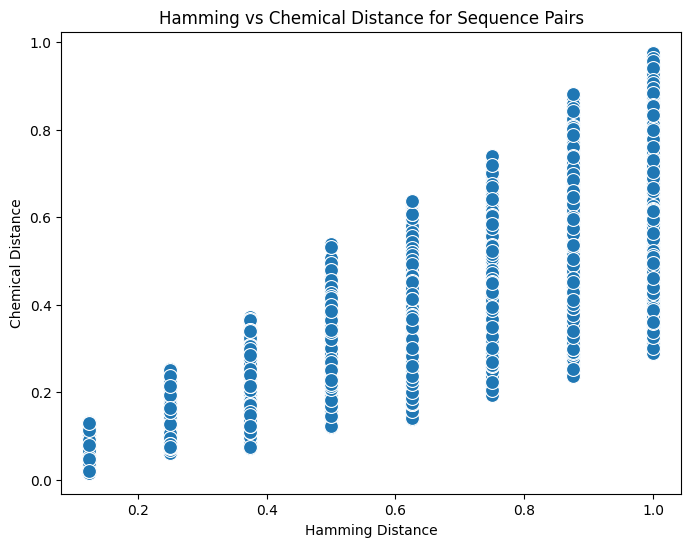

In [7]:

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Create a scatter plot with seaborn
sns.scatterplot(data=df, x='hamming_distance', y='chemical_distance', s=100)

# # Add threshold lines for "high" Hamming and "low" chemical distances
# plt.axhline(y=low_chemical_threshold, color='r', linestyle='--', label=f'Low Chemical Threshold ({low_chemical_threshold})')
# plt.axvline(x=high_hamming_threshold, color='b', linestyle='--', label=f'High Hamming Threshold ({high_hamming_threshold})')

# Add labels and title
plt.xlabel('Hamming Distance')
plt.ylabel('Chemical Distance')
plt.title('Hamming vs Chemical Distance for Sequence Pairs')

# Display legend and plot
plt.legend().remove()
plt.show()


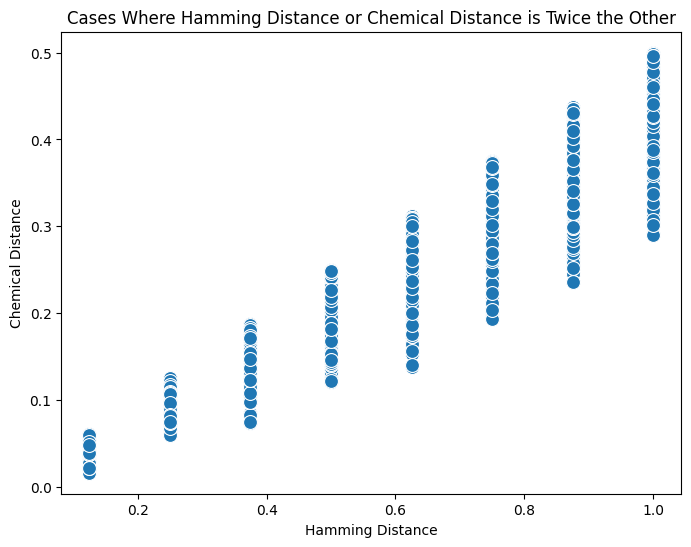

In [8]:
# Filter for cases where hamming distance is more than twice the chemical distance or vice versa
extreme_ratio_df = df[
    (df['hamming_distance'] >= 2 * df['chemical_distance']) | 
    (df['chemical_distance'] >= 2 * df['hamming_distance'])
]

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Create a scatter plot with seaborn for the extreme ratio cases
sns.scatterplot(data=extreme_ratio_df, x='hamming_distance', y='chemical_distance', s=100)

# Add labels and title
plt.xlabel('Hamming Distance')
plt.ylabel('Chemical Distance')
plt.title('Cases Where Hamming Distance or Chemical Distance is Twice the Other')

# Display the plot
plt.show()


In [11]:
# Add a column for the absolute difference between Hamming and chemical distances
df['abs_difference'] = abs(df['hamming_distance'] - df['chemical_distance'])

# Find the row with the greatest difference
greatest_diff_row = df.loc[df['abs_difference'].idxmax()]

# Display the greatest difference
print("Sequence pair with the greatest difference:")
print(greatest_diff_row)





Sequence pair with the greatest difference:
hamming_distance                   1.0
chemical_distance                 0.29
sequence_1           CASSIDLTSGVYNEQFF
sequence_2             CASTSVRDRLEKLFF
abs_difference                    0.71
Name: 355887, dtype: object


In [17]:
import networkx as nx
import pandas as pd
from pyvis.network import Network


df = pd.read_csv("output_files/tests/cdr3/predicted clusters.csv")
# Create a graph
G = nx.Graph()

# Add nodes to the graph
for cdr3 in df['cdr3'].unique():
    G.add_node(cdr3)

# Add edges between cdr3s that share the same epitope
for epitope in df['epitope.pred'].unique():
    cdr3s = df[df['epitope.pred'] == epitope]['cdr3']
    for i in range(len(cdr3s)):
        for j in range(i + 1, len(cdr3s)):
            G.add_edge(cdr3s.iloc[i], cdr3s.iloc[j])
            
G.remove_edges_from(nx.selfloop_edges(G))


# Create Network object
net = Network(notebook=True)

# Load networkx graph into pyvis
net.from_nx(G)

# Enable options for better visualization
net.show_buttons(filter_=['physics'])

# Save and display
# net.show('graph.html')
net.save_graph('output_files/chephy_graph.html')

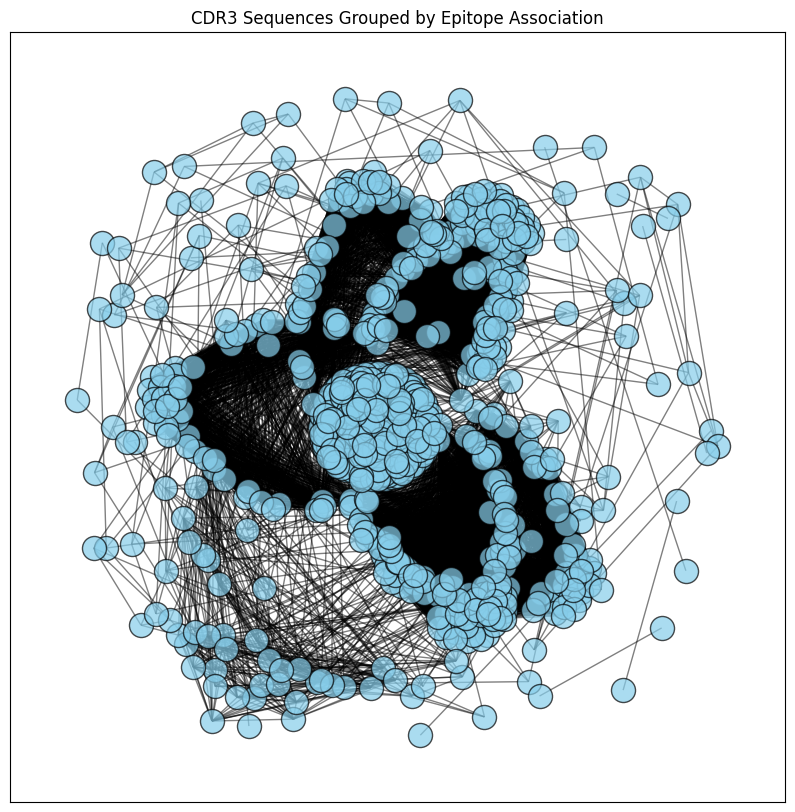

In [16]:
# Define positions using spring layout
pos = nx.spring_layout(G, k=0.3, iterations=20)  # Adjust k and seed for better visualization

# Draw the graph
plt.figure(figsize=(10, 10))

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=300, node_color='skyblue', alpha=0.7, edgecolors='black')
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)

# Show plot
plt.title('CDR3 Sequences Grouped by Epitope Association')
plt.show()


In [15]:

import networkx as nx
import pandas as pd
from pyvis.network import Network


df = pd.read_csv("output_files/tests/cdr3/predicted clusters.csv")
# Create a graph
G = nx.Graph()

# Add nodes to the graph
for cdr3 in df['cdr3'].unique():
    G.add_node(cdr3)

# Add edges between cdr3s that share the same epitope
for epitope in df['epitope.ham'].unique():
    cdr3s = df[df['epitope.ham'] == epitope]['cdr3']
    for i in range(len(cdr3s)):
        for j in range(i + 1, len(cdr3s)):
            G.add_edge(cdr3s.iloc[i], cdr3s.iloc[j])
G.remove_edges_from(nx.selfloop_edges(G))


# Create Network object
net = Network(notebook=True)

# Load networkx graph into pyvis
net.from_nx(G)

# Enable options for better visualization
net.show_buttons(filter_=['physics'])

# Save and display
# net.show('graph.html')
net.save_graph('output_files/ham_graph.html')

In [3]:
import pandas as pd

d = pd.read_csv("output_files/tests/cdr3/predicted clusters.csv")

d[(d["antigen.epitope"] == "RGYVYQGL") ]

,cdr3,antigen.epitope,vdjdb.score,epitope.pred,epitope.ham
737,CTCSADRVGNTLYF,RGYVYQGL,3,NLVPMVATV,QMMVKAGL
1387,CASSFGVSYEQYF,RGYVYQGL,3,GILGFVFTL,NLVPMVATV
1388,CASSFHISYEQYF,RGYVYQGL,3,GILGFVFTL,NLVPMVATV
1389,CASSFGVNSDYTF,RGYVYQGL,3,ADLIAYLKQATKG,NLVPMVATV
1390,CASSFGVNSDYTF,RGYVYQGL,3,ADLIAYLKQATKG,NLVPMVATV
1391,CASSFGVSYEQYF,RGYVYQGL,3,GILGFVFTL,NLVPMVATV
1392,CASSFGVSYEQYF,RGYVYQGL,3,GILGFVFTL,NLVPMVATV
1393,CASSFGVNSDYTF,RGYVYQGL,3,ADLIAYLKQATKG,NLVPMVATV
1394,CASSPGTGVEQYF,RGYVYQGL,3,PSGEGSFQPSQENPQ,NLVPMVATV
1395,CASSFGVSYEQYF,RGYVYQGL,3,GILGFVFTL,NLVPMVATV
